# Bangladesh creating temp plots and anomalies
Plot the disparity between climate change data and picontrol and the anomaly throughout history and in the future. It also provides data on spatial analysis at any given time point.

In [2]:
from netCDF4 import Dataset
import cartopy
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import xarray as xr

## Where to find the data on Jasmin
1950 until 2014 for historical data and 2015 to 2100 for scenario and picontrol data
If running on Jasmin, this cell does not have to be run as the next cells will merge and select the data




historical_file = '/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Amon/tas/gn/latest/tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc'
scenario_file20152049 = '/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/Amon/tas/gn/latest/tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_201501-204912.nc'
scenario_file20502100 = '/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/Amon/tas/gn/latest/tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_205001-210012.nc'
picontrol_file_19602049 = '/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/Amon/tas/gn/latest/tas_Amon_UKESM1-0-LL_piControl_r1i1p1f2_gn_196001-204912.nc'
picontrol_file_20502149 = '/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/Amon/tas/gn/latest/tas_Amon_UKESM1-0-LL_piControl_r1i1p1f2_gn_205001-214912.nc'

In [12]:
## make cells code instead of markdown to combine, select and prepare all three datasets

#lat_bnds, lon_bnds = [20, 27], [86, 95]
!cdo sellonlatbox,86,95,20,27 /badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Amon/tas/gn/latest/tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc bang_hist.nc
!cdo sellonlatbox,86,95,20,27 /badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/Amon/tas/gn/latest/tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_201501-204912.nc bang_fut1.nc
!cdo sellonlatbox,86,95,20,27 /badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/Amon/tas/gn/latest/tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_205001-210012.nc bang_fut2.nc
!cdo sellonlatbox,86,95,20,27 /badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/Amon/tas/gn/latest/tas_Amon_UKESM1-0-LL_piControl_r1i1p1f2_gn_196001-204912.nc bang_picon1.nc
!cdo sellonlatbox,86,95,20,27 /badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/Amon/tas/gn/latest/tas_Amon_UKESM1-0-LL_piControl_r1i1p1f2_gn_205001-214912.nc bang_picon2.nc

!cdo mergetime bang_fut1.nc bang_fut2.nc scenario_all.nc
!cdo mergetime scenario_all.nc bang_hist.nc tas_hist_fut.nc
!cdo mergetime bang_picon1.nc bang_picon2.nc tas_picontrol.nc

!cdo yearmean tas_hist_fut.nc tas_yearmean_hist_fut.nc
!cdo yearmean tas_picontrol.nc tas_yearmean_picontrol.nc

check_all = xr.open_dataset('tas_picontrol.nc')
check_all.variables['time'][:]

### open all datasets and assign values
These can be run once all the dataprocessing has occured in previous cells

tas_hist_fut = xr.open_dataset('data/tas_hist_fut.nc')


tas_picontrol = xr.open_dataset('data/tas_picontrol.nc')


tas_yearmean_hist_fut = xr.open_dataset('data/tas_yearmean_hist_fut.nc')


tas_yearmean_picontrol = xr.open_dataset('data/tas_yearmean_picontrol.nc')

## Temperature-time plot of both the picontrol and model datasets
Due to the multi-dimensional nature of the dataset, either time or space have to be specified in order to plot the data. In this case, location/grid is specified in order to plot the temperature over time. This is being done to break up the grids and perform calculations and plots on each subset of the data.

In [8]:
def breakup_grids(filename, lon, lat):
    number_lat = np.shape(filename["tas"]["lat"])[0]
    number_lon = np.shape(filename["tas"]["lon"])[0]
    
    save_grid_points = []
    for grid_lat in range(number_lat):
        latitude = filename["tas"]["lat"].values[grid_lat]
        for grid_lon in range(number_lon):
            longitude = filename["tas"]["lon"].values[grid_lon]
            one_point = filename["tas"].sel(lat=latitude,
                                                lon=longitude)
            save_grid_points.append([[longitude, latitude], one_point])
            if longitude == lon and latitude == lat:
                one_point.plot.line()
                plt.show()
    return save_grid_points

In [10]:
#grid_points_year_historical = breakup_grids(tas_picontrol, 89.0625, 23.125)
#grid_points_year_historical = breakup_grids(tas_yearmean_hist_fut, 89.0625, 23.125)

In [11]:
def breakup_two_grids(filename1, filename2, lon, lat):
    """ This function compares a variable from two different datasets at one point 
    in the grids. This can for example be the difference between climate modelling data
    and the picontrol scenario, comparing them on the time axis.
    """
    number_lat = np.shape(filename1["tas"]["lat"])[0]
    number_lon = np.shape(filename1["tas"]["lon"])[0]
    
    filename1 = filename1.sel(time=slice('1960','2100'))
    filename2 = filename2.sel(time=slice('1960','2100'))
    
    save_grid_points1 = []
    save_grid_points2 = []
    i = 0
    
    # looping over each grid
    for grid_lat in range(number_lat):
        latitude = filename1["tas"]["lat"].values[grid_lat]
        for grid_lon in range(number_lon):
            longitude = filename1["tas"]["lon"].values[grid_lon]
            # within each spefic grid
            one_point1 = filename1["tas"].sel(lat=latitude,
                                                lon=longitude)
            one_point1 = filename1["tas"].sel(lat=latitude,
                                                lon=longitude)
            save_grid_points1.append([[longitude, latitude], one_point1])
            
            one_point2 = filename2["tas"].sel(lat=latitude,
                                                lon=longitude)
            save_grid_points2.append([[longitude, latitude], one_point2])
            
            i += 1
            if longitude == lon and latitude == lat:
                one_point1.plot.line(color='purple', hue='experiment_id')
                one_point2.plot.line(_labels = "yo")
                plt.show()
        
    print('Number of grid points is', i)
    return save_grid_points1, save_grid_points2

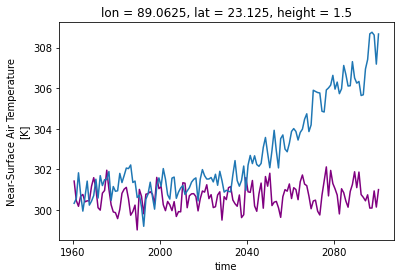

Number of grid points is 30


In [11]:
grid_points_year_picontrol, grid_points_year_hist_fut = breakup_two_grids(tas_yearmean_picontrol, tas_yearmean_hist_fut, 89.0625, 23.125)

## Example of decomposing a trend line
Data for the first grid in the yearly data for historical and future data is being used as an example on how the detrending works using statsmodels. This detrending is being used in the AMf_automated file to detrend historic and future climate data. Namely, this will help with setting certain thresholds over time since the relative magnitude should be studied after detrending, not the trend itself.

In [56]:
temperature_data = grid_points_year_hist_fut[0][1]

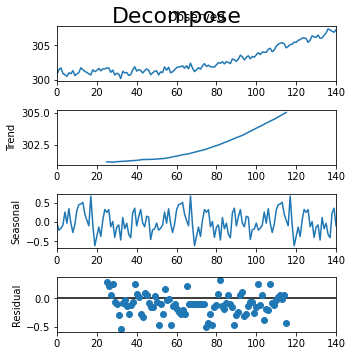

In [55]:
# using a model called Statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(temperature_data, model='additive', period=50)
trend = decomposition.trend
plt.rcParams.update({'figure.figsize': (5,5)})
decomposition.plot().suptitle('Decompose', fontsize=22)
plt.show()

## Temperature anomaly
Calculate the relative temperature anomaly and make it into a new dataset. This new anomaly dataset can then be plotted, which here is a spatial plot when time should be specified.

In [13]:
anomaly = tas_yearmean_hist_fut.sel(time=slice('1960','2100')) - tas_yearmean_picontrol.sel(time=slice('1960','2100'))

In [14]:
anomaly

<xarray.Dataset>
Dimensions:    (time: 141, lon: 5, lat: 6, bnds: 2)
Coordinates:
  * time       (time) object 1960-07-01 00:00:00 ... 2100-07-01 00:00:00
  * lon        (lon) float64 87.19 89.06 90.94 92.81 94.69
  * lat        (lat) float64 20.62 21.88 23.12 24.38 25.62 26.88
    height     float64 1.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) timedelta64[ns] 00:00:00 00:00:00 ... 00:00:00
    lon_bnds   (lon, bnds) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
    lat_bnds   (lat, bnds) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    tas        (time, lat, lon) float32 -0.2428 -0.1435 -0.2552 ... 6.272 6.332

In [15]:
anomaly['tas_anomaly'] = anomaly['tas']
anomaly = anomaly.drop(['tas'])

/opt/jaspy/lib/python3.8/site-packages/xarray/plot/facetgrid.py:394: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


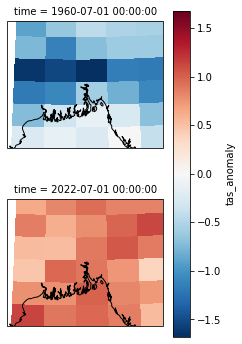

In [16]:
import cartopy.crs as ccrs
tas = anomaly.tas_anomaly.isel(time=[0, 62]) # historical/future - picontrol

# This is the map projection we want to plot *onto*
map_proj = ccrs.LambertConformal(central_longitude=90, central_latitude=25)

p = tas.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    col="time",
    col_wrap=1,  # multiplot settings
    aspect=anomaly.dims["lon"] / anomaly.dims["lat"], 
    subplot_kws={"projection": map_proj},
)  # the plot's projection

for ax in p.axes.flat:
    ax.coastlines()
    ax.set_extent([86, 95, 20, 27])